In [29]:
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
#import community as community_louvain #Para louvain
#import networkx# as nx #Para grafos

In [30]:
stock_data = pd.read_csv(r"C:\Users\martu\Documents\martu\UCEMA\2 - PRIMER CUATRI\INFORMATICA\segunda parte\dataset_clustering_teorico.csv")
stock_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [31]:
stock_data.info(max_cols=1000)

2011-12-08  60 non-null     float64
 490  2011-12-09  60 non-null     float64
 491  2011-12-12  60 non-null     float64
 492  2011-12-13  60 non-null     float64
 493  2011-12-14  60 non-null     float64
 494  2011-12-15  60 non-null     float64
 495  2011-12-16  60 non-null     float64
 496  2011-12-19  60 non-null     float64
 497  2011-12-20  60 non-null     float64
 498  2011-12-21  60 non-null     float64
 499  2011-12-22  60 non-null     float64
 500  2011-12-23  60 non-null     float64
 501  2011-12-27  60 non-null     float64
 502  2011-12-28  60 non-null     float64
 503  2011-12-29  60 non-null     float64
 504  2011-12-30  60 non-null     float64
 505  2012-01-03  60 non-null     float64
 506  2012-01-04  60 non-null     float64
 507  2012-01-05  60 non-null     float64
 508  2012-01-06  60 non-null     float64
 509  2012-01-09  60 non-null     float64
 510  2012-01-10  60 non-null     float64
 511  2012-01-11  60 non-null     float64
 512  2012-01-12  60 non-null     float6

In [32]:
stock_data.dropna(inplace=True)
stock_data.drop_duplicates(inplace=True)
len(stock_data) #no hay duplicados ni Nan

60

In [33]:
stock_data = stock_data.set_index('Unnamed: 0')
stock_data

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996


In [34]:
'''
Usando el interquantile vemos la cantidad de outliers por columna
def outliers(df,columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3-Q1 
    li = Q1 - 1.5*IQR
    ls = Q3 + 1.5*IQR
    print(len(df[(df[columna]<li) | (df[columna]>ls)])) #cantidad de outliers
for i in stock_data.columns:
    outliers(stock_data, i)
    '''

'\nUsando el interquantile vemos la cantidad de outliers por columna\ndef outliers(df,columna):\n    Q1 = df[columna].quantile(0.25)\n    Q3 = df[columna].quantile(0.75)\n    IQR = Q3-Q1 \n    li = Q1 - 1.5*IQR\n    ls = Q3 + 1.5*IQR\n    print(len(df[(df[columna]<li) | (df[columna]>ls)])) #cantidad de outliers\nfor i in stock_data.columns:\n    outliers(stock_data, i)\n    '

In [35]:
'''
#FORMA 1 PARA FILTRAR: CON RANGO INTERCUANTIL
Q1 = stock_data['2010-01-04'].quantile(0.25) 
print("Primer Cuartil", Q1)
#eL valor por debajo del cual se encuentra el 25% de los datos
#Va a ser el limite izquierdo
Q3 = stock_data['2010-01-04'].quantile(0.75)
print("Tercer Cuartil", Q3)
#eL valor por debajo del cual se encuentra el 75% de los datos
#Va a ser el limite derecho
IQR = Q3 - Q1 
print("Rango Intercuartil", IQR)
#Va a ser el tamaño del rango
print("Valor minimo", stock_data['2010-01-04'].min())
print("Valor maximo", stock_data['2010-01-04'].max())

Li = (Q1 - 1.5* IQR)
print("Limite inferior", Li)
#si el valor minimo de los datos es mayor que este, el limite inferior de los datos se ubicara en el valor minimo 
Ls= (Q3 + 1.5*IQR)
print("Limite superior", Ls)
#Si el maximo de los datos es menor que este, el limite superior de los datos se ubicara en el valor maximo
'''


'\n#FORMA 1 PARA FILTRAR: CON RANGO INTERCUANTIL\nQ1 = stock_data[\'2010-01-04\'].quantile(0.25) \nprint("Primer Cuartil", Q1)\n#eL valor por debajo del cual se encuentra el 25% de los datos\n#Va a ser el limite izquierdo\nQ3 = stock_data[\'2010-01-04\'].quantile(0.75)\nprint("Tercer Cuartil", Q3)\n#eL valor por debajo del cual se encuentra el 75% de los datos\n#Va a ser el limite derecho\nIQR = Q3 - Q1 \nprint("Rango Intercuartil", IQR)\n#Va a ser el tamaño del rango\nprint("Valor minimo", stock_data[\'2010-01-04\'].min())\nprint("Valor maximo", stock_data[\'2010-01-04\'].max())\n\nLi = (Q1 - 1.5* IQR)\nprint("Limite inferior", Li)\n#si el valor minimo de los datos es mayor que este, el limite inferior de los datos se ubicara en el valor minimo \nLs= (Q3 + 1.5*IQR)\nprint("Limite superior", Ls)\n#Si el maximo de los datos es menor que este, el limite superior de los datos se ubicara en el valor maximo\n'

In [36]:
'''
stock_filtrado = pd.DataFrame()
for i in stock_data.columns:
    stock_filtrado = stock_data[(stock_data[i] < ls) & (stock_data[i] > li)]
    stock_filtrado[i] = stock_data[(stock_data[i] < ls) & (stock_data[i] > li)]
stock_filtrado
'''

'\nstock_filtrado = pd.DataFrame()\nfor i in stock_data.columns:\n    stock_filtrado = stock_data[(stock_data[i] < ls) & (stock_data[i] > li)]\n    stock_filtrado[i] = stock_data[(stock_data[i] < ls) & (stock_data[i] > li)]\nstock_filtrado\n'

In [37]:
stock_filtrado = pd.DataFrame()
#armamos dataframe vacio

urning-a-view-versus-a-copy
  stock_filtrado[i] = stock_data[(stock_data[i] < stock_data[i].quantile(.85)) & (stock_data[i] > stock_data[i].quantile(.07))]
<ipython-input-38-083fff2d8df6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_filtrado[i] = stock_data[(stock_data[i] < stock_data[i].quantile(.85)) & (stock_data[i] > stock_data[i].quantile(.07))]
<ipython-input-38-083fff2d8df6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_filtrado[i] = stock_data[(stock_data[i] < stock_data[i].quanti

<AxesSubplot:xlabel='2010-01-04'>

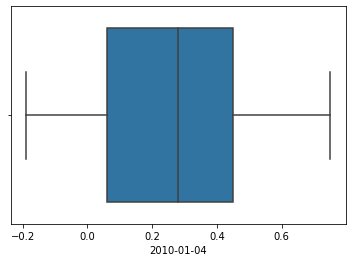

In [38]:
#Filtro todas las columnas a traves de quantilepara quitar los otuliers

for i in stock_data.columns:
    stock_filtrado = stock_data[(stock_data[i] < stock_data[i].quantile(.85)) & (stock_data[i] > stock_data[i].quantile(.07))]
#Como no me deja agregar las columnas sin un indice o no se que error tiraba, creo el df mal pero con sus respectivas columnas e indices y luego superpongo las columnas por las buenas.

for i in stock_data.columns:
    stock_filtrado[i] = stock_data[(stock_data[i] < stock_data[i].quantile(.85)) & (stock_data[i] > stock_data[i].quantile(.07))]

import seaborn as sns
sns.boxplot(x=stock_filtrado["2010-01-04"])

In [39]:
print(len(stock_filtrado))
print(100-(len(stock_filtrado)*100/len(stock_data)))
#Se perdio un 23.33333333%, de 60 quedaron 46 datos.

46
23.33333333333333


In [40]:
#Vemos el dataframe filtrado(primeras 5 filas)
stock_filtrado.head() #Se generaron Nan.

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AIG,NaN,NaN,-0.640002,-0.640002,-0.640002,-0.640002,NaN,-0.640002,-0.640002,-0.640002,...,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,NaN,-0.640002
American express,0.109997,0.109997,0.109997,NaN,0.109997,0.109997,NaN,0.109997,NaN,0.109997,...,0.109997,NaN,0.109997,0.109997,0.109997,0.109997,0.109997,NaN,0.109997,0.109997
Boeing,0.459999,NaN,NaN,NaN,0.459999,0.459999,0.459999,0.459999,0.459999,0.459999,...,NaN,NaN,0.459999,0.459999,0.459999,NaN,0.459999,NaN,NaN,0.459999
Bank of America,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,...,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000
Canon,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,...,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000


In [50]:
stock_filtrado.info(max_cols=1000)
#El minimo de valores no nulos es 36, y el total de filas es 46. Quiere decir que por lo menos en todas las filas hay 10 Nan. No tendira sentido sacarlos porque no son tantos en comparacion a la cantidad de datos, asi que los reemplazamos por la media.

at64
 488  2011-12-08  46 non-null     float64
 489  2011-12-09  46 non-null     float64
 490  2011-12-12  46 non-null     float64
 491  2011-12-13  46 non-null     float64
 492  2011-12-14  46 non-null     float64
 493  2011-12-15  46 non-null     float64
 494  2011-12-16  46 non-null     float64
 495  2011-12-19  46 non-null     float64
 496  2011-12-20  46 non-null     float64
 497  2011-12-21  46 non-null     float64
 498  2011-12-22  46 non-null     float64
 499  2011-12-23  46 non-null     float64
 500  2011-12-27  46 non-null     float64
 501  2011-12-28  46 non-null     float64
 502  2011-12-29  46 non-null     float64
 503  2011-12-30  46 non-null     float64
 504  2012-01-03  46 non-null     float64
 505  2012-01-04  46 non-null     float64
 506  2012-01-05  46 non-null     float64
 507  2012-01-06  46 non-null     float64
 508  2012-01-09  46 non-null     float64
 509  2012-01-10  46 non-null     float64
 510  2012-01-11  46 non-null     float64
 511  2012-01-12  46 non-null

In [51]:
#Remplazo Nan por la media de la columna
for i in stock_data.columns:
    stock_filtrado.fillna(stock_filtrado[i].mean(), inplace=True)
stock_filtrado.head()

C:\Users\martu\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AIG,0.258108,0.258108,-0.640002,-0.640002,-0.640002,-0.640002,0.258108,-0.640002,-0.640002,-0.640002,...,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,-0.640002,0.258108,-0.640002
American express,0.109997,0.109997,0.109997,0.258108,0.109997,0.109997,0.258108,0.109997,0.258108,0.109997,...,0.109997,0.258108,0.109997,0.109997,0.109997,0.109997,0.109997,0.258108,0.109997,0.109997
Boeing,0.459999,0.258108,0.258108,0.258108,0.459999,0.459999,0.459999,0.459999,0.459999,0.459999,...,0.258108,0.258108,0.459999,0.459999,0.459999,0.258108,0.459999,0.258108,0.258108,0.459999
Bank of America,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,...,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000
Canon,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,...,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000,0.730000


In [44]:
#Ahora quedaron las 46 filas completas y no perdimos datos.
stock_filtrado.info(max_cols=1000)

at64
 488  2011-12-08  46 non-null     float64
 489  2011-12-09  46 non-null     float64
 490  2011-12-12  46 non-null     float64
 491  2011-12-13  46 non-null     float64
 492  2011-12-14  46 non-null     float64
 493  2011-12-15  46 non-null     float64
 494  2011-12-16  46 non-null     float64
 495  2011-12-19  46 non-null     float64
 496  2011-12-20  46 non-null     float64
 497  2011-12-21  46 non-null     float64
 498  2011-12-22  46 non-null     float64
 499  2011-12-23  46 non-null     float64
 500  2011-12-27  46 non-null     float64
 501  2011-12-28  46 non-null     float64
 502  2011-12-29  46 non-null     float64
 503  2011-12-30  46 non-null     float64
 504  2012-01-03  46 non-null     float64
 505  2012-01-04  46 non-null     float64
 506  2012-01-05  46 non-null     float64
 507  2012-01-06  46 non-null     float64
 508  2012-01-09  46 non-null     float64
 509  2012-01-10  46 non-null     float64
 510  2012-01-11  46 non-null     float64
 511  2012-01-12  46 non-null

In [53]:
#Normalizar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock_data_normalizado = scaler.fit_transform(stock_filtrado)

In [56]:
from sklearn.cluster import KMeans
k = 14 
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(stock_data_normalizado)
print(kmeans.labels_)
print(kmeans.cluster_centers_ )

[ 2  6  8  8  5 11  5  5  5  9 10  6  9  3 10  8  5  6 12  4  7  5  6  0
  1 12 13  5 12  5  4  8  8  1  1 12  6 10 12  5  9  1  8  8 12  6]
[[-1.46265019e+00 -1.38330302e+00 -1.13073828e+00 ... -1.42743582e-01
  -1.38664787e+00 -8.83839472e-01]
 [ 3.20484516e-01  4.09170339e-04 -1.47084431e-02 ...  8.07815901e-02
  -6.89634073e-02 -1.34407617e-01]
 [-2.47460114e-16 -2.17770130e-01 -2.79591492e+00 ... -2.93511956e+00
  -2.54940135e-01 -1.95178749e+00]
 ...
 [-2.47460114e-16 -2.17770130e-01  1.70295677e+00 ...  1.85299795e+00
   1.95906549e+00  9.33528689e-01]
 [-9.35141487e-01 -6.69168557e-01 -6.44770719e-01 ... -7.94967485e-01
  -8.58861707e-01 -6.62133382e-01]
 [ 5.87971939e-01  2.50763384e-01 -1.72223830e-01 ...  2.67343404e-01
   1.99995977e-01 -2.19856022e-02]]


C:\Users\martu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
inertia: 5219.3264999553485


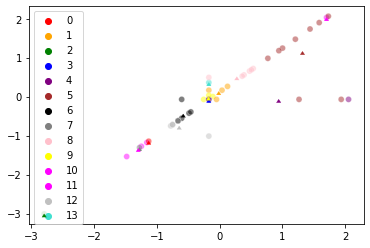

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'black', 'grey', 'pink', 'yellow', 'magenta', 'fuchsia', 'silver', 'turquoise']
g = sns.scatterplot(x = stock_data_normalizado[:,2], y = stock_data_normalizado[:, 3], hue = kmeans.labels_, palette=colors, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette=colors, hue = [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], legend = False, marker=6, s=20)

plt.savefig('kmean.png')
print("inertia: " + str(kmeans.inertia_))

In [65]:
inertia_k = {}
valores_k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
inertia_k["k"] = valores_k
inertia_lista = []
k = 0 
while k < 14:
    k += 1 
    kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
    kmeans.fit(stock_data_normalizado) 
    inertia = kmeans.inertia_
    inertia_lista.append(inertia)
    inertia_k["inertia"] = inertia_lista
inertia_k

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'inertia': [44298.00000000001,
  23549.502707837455,
  18412.22606638405,
  13537.608666859174,
  9193.47368881422,
  8026.738513833781,
  7079.86030819175,
  6846.260085178449,
  6346.439105984206,
  5220.118843754904,
  5094.218909124683,
  3952.647189336278,
  5243.288141918497,
  5219.3264999553485]}

In [66]:
k_vs_inertia = pd.DataFrame(inertia_k)
k_vs_inertia

,k,inertia
0,1,44298.000000
1,2,23549.502708
2,3,18412.226066
3,4,13537.608667
4,5,9193.473689
5,6,8026.738514
6,7,7079.860308
7,8,6846.260085
8,9,6346.439106
9,10,5220.118844


<AxesSubplot:xlabel='k', ylabel='inertia'>

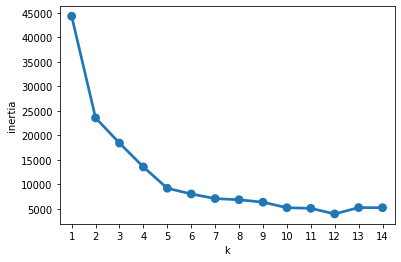

In [67]:
inertia_vs_k = sns.pointplot(data = k_vs_inertia, x="k", y="inertia")
inertia_vs_k

In [ ]:
#El "codo" se produce aproximadamente en el k=5, que es la cantidad de clusters optimo que habia inferido en la clase previa a hacer la limpieza del dataframe. K=14 eran muchos clusters.

In [68]:
silhouette_avg = silhouette_score(stock_data_normalizado, kmeans.labels_)

sample_silhouette_values = silhouette_samples(stock_data_normalizado, kmeans.labels_)

In [69]:

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

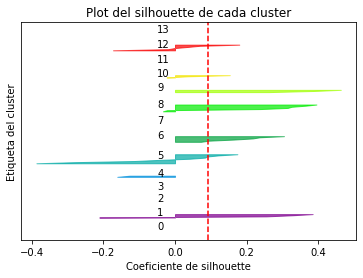

In [70]:
k = 14
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_data_normalizado)
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [71]:
#Con 5
k = 5  
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(stock_data_normalizado)

kmeans.labels_
kmeans.cluster_centers_

array([[-1.03784980e+00, -9.41107264e-01, -8.02845587e-01, ...,
        -7.79505830e-01, -9.24821666e-01, -7.05300554e-01],
       [ 5.61207037e-01,  1.71702794e-01,  7.68527600e-02, ...,
         2.02291292e-01,  6.30085703e-02, -3.32345954e-02],
       [-2.47460114e-16, -2.17770130e-01, -2.79591492e+00, ...,
        -2.93511956e+00, -2.54940135e-01, -1.95178749e+00],
       [-2.47460114e-16, -2.17770130e-01, -1.72223830e-01, ...,
        -1.42743582e-01, -2.54940135e-01,  4.92426455e+00],
       [ 7.68778422e-01,  1.15490182e+00,  1.28864353e+00, ...,
         1.10792441e+00,  1.27389334e+00,  7.93012607e-01]])

C:\Users\martu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


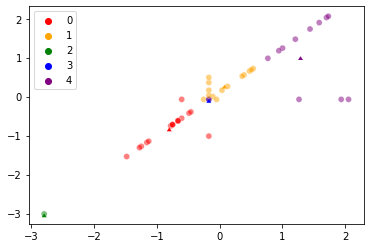

In [72]:
colors = ['red', 'orange', 'green', 'blue', 'purple']
g = sns.scatterplot(x = stock_data_normalizado[:,2], y = stock_data_normalizado[:, 3], hue = kmeans.labels_, palette=colors, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette=colors, hue = [0,1, 2,3,4], legend = False, marker=6, s=20)

plt.savefig('kmean1.png')

In [73]:
silhouette_avg = silhouette_score(stock_data_normalizado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(stock_data_normalizado, kmeans.labels_)

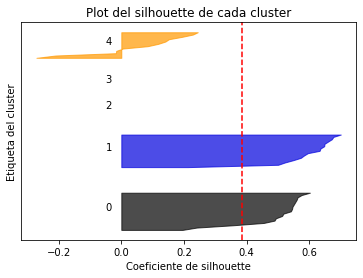

In [74]:
k = 5
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_data_normalizado)
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [ ]:
#la cantidad de datos que estan del lado positivo es mayor a la cantidad que hay con k=14. Y hay mas datos que superan el promedio.

In [75]:
silhouette_avg = [] 
for k in range(2,15): #desde 2 a 14 clusters
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=123457)
    kmeans.fit(stock_data_normalizado)
    silhouette_avg.append(silhouette_score(stock_data_normalizado, kmeans.labels_))

     K  SilhouettePromedio
0    2            0.431219
1    3            0.343577
2    4            0.429883
3    5            0.385767
4    6            0.377182
5    7            0.316420
6    8            0.287050
7    9            0.238011
8   10            0.261998
9   11            0.189510
10  12            0.184503
11  13            0.107248
12  14            0.091303


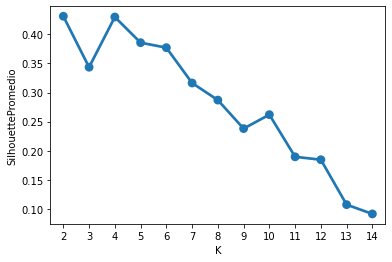

In [77]:
df = pd.DataFrame({'K':list(range(2,15)),'SilhouettePromedio':silhouette_avg})
print(df)
g = sns.pointplot(data=df, x='K', y='SilhouettePromedio')
#Con k=5 el Silohuette promedio esta cerca de 0,40.